#Indeks Pembangunan Manusia

###Problem Scoping
---
1. Who: 
  * Siapa yang mengalami & terlibat masalah: Masyarakat & Pemerintah
2. What: 
  * Apa masalah: Kurangnya pemanfaatan SDM
3. Where: 
  * Dimana masalah tersebut terjadi: Di seluruh Indonesia
4. Why: 
  * Solusi dari masalah tersebut: Memprediksi IPM berdasarkan kategori yang sudah tersedia

In [ ]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

###Data Acquisition
---
1. Data yang saya gunakan adalah IPM.csv
2. Variabel data yang saya gunakan adalah:
  * Harapan_Lama_Sekolah
  * Pengeluaran_Perkapita
  * Rerata_Lama_Sekolah
  * Usia_Harapan_Hidup
  * IPM
3. Tidak ada missing value dari variabel data
4. Untuk nilai yang ada dalam variabel data IPM adalah:
  * Low: 0
  * Normal: 1
  * High: 2
  * Very-High: 3

In [ ]:
df = pd.read_csv('IPM.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int64  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 85.9+ KB


In [ ]:
df.rename(columns = {'Harapan_Lama_Sekolah':'harapan_lama_sekolah',
                     'Pengeluaran_Perkapita':'pengeluaran_perkapita',
                     'Rerata_Lama_Sekolah':'rerata_lama_sekolah',
                     'Usia_Harapan_Hidup':'usia_harapan_hidup'}, inplace = True)

In [ ]:
df.describe()

,harapan_lama_sekolah,pengeluaran_perkapita,rerata_lama_sekolah,usia_harapan_hidup
count,2196.000000,2196.000000,2196.000000,2196.000000
mean,12.931498,9.832878,8.291585,69.467418
std,1.312967,2.671683,1.611256,3.437536
min,2.950000,3.000000,0.850000,54.820000
25%,12.350000,8.000000,7.390000,67.210000
50%,12.860000,10.000000,8.180000,69.785000
75%,13.570000,11.000000,9.180000,71.712500
max,17.800000,23.000000,12.830000,77.730000


In [ ]:
df['IPM'].unique()

array(['High', 'Normal', 'Very-High', 'Low'], dtype=object)

In [ ]:
#Inisialisasi variabel X
X = df[['harapan_lama_sekolah','pengeluaran_perkapita','rerata_lama_sekolah','usia_harapan_hidup']]

In [ ]:
X.head(20)

,harapan_lama_sekolah,pengeluaran_perkapita,rerata_lama_sekolah,usia_harapan_hidup
0,14.36,9,9.37,69.96
1,13.90,7,9.48,65.28
2,14.32,8,8.68,67.43
3,14.60,8,8.88,64.40
4,14.01,8,9.67,68.22
5,13.04,8,8.21,68.74
6,14.28,10,9.86,68.86
7,14.61,9,9.55,67.99
8,14.73,9,10.33,69.79
9,14.47,9,9.00,66.95


In [ ]:
X.tail(20)

,harapan_lama_sekolah,pengeluaran_perkapita,rerata_lama_sekolah,usia_harapan_hidup
2176,10.53,6,6.29,64.56
2177,8.47,5,4.74,56.88
2178,7.59,4,4.01,65.52
2179,5.79,5,2.49,64.08
2180,8.04,4,3.62,65.30
2181,11.55,6,8.52,66.00
2182,12.14,8,7.83,66.35
2183,12.77,6,8.87,65.99
2184,12.72,5,8.39,65.53
2185,11.30,4,5.46,57.18


In [ ]:
#Inisialisasi variabel y
y = df['IPM']

In [ ]:
y.head(20)

0          High
1        Normal
2        Normal
3        Normal
4        Normal
5        Normal
6          High
7          High
8          High
9          High
10         High
11       Normal
12       Normal
13       Normal
14       Normal
15       Normal
16       Normal
17         High
18         High
19    Very-High
Name: IPM, dtype: object

In [ ]:
y.tail(20)

2176       Low
2177       Low
2178       Low
2179       Low
2180       Low
2181    Normal
2182    Normal
2183    Normal
2184    Normal
2185       Low
2186       Low
2187       Low
2188       Low
2189       Low
2190       Low
2191       Low
2192       Low
2193       Low
2194      High
2195      High
Name: IPM, dtype: object

###Data Exploration
---
Didapatkan nilai tertinggi dari variabel data IPM adalah:
1. Normal
2. High
3. Very-High
4. Low

Text(0.5, 1.0, 'Most IPM')

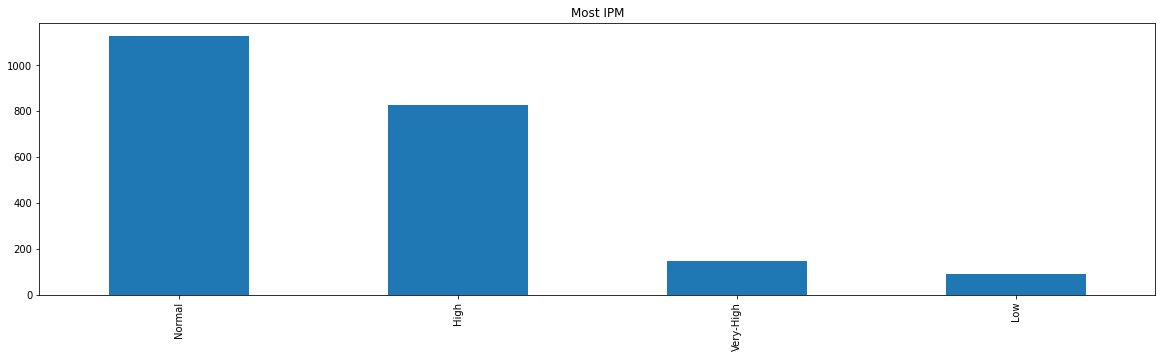

In [ ]:
most_ipm = df['IPM'].value_counts()
plt.figure(figsize=(20,5))
most_ipm.plot(kind='bar')
plt.title('Most IPM')

In [ ]:
#Splitting dataset menjadi data training sebesar 75% dan data testing sebesar 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

###Modelling

In [ ]:
#Inisialisasi model Random Forest dengan estimators sebanyak 10
rf = RandomForestClassifier(n_estimators=10, criterion="entropy")

In [ ]:
#Modelling Random Forest dari data training
model = rf.fit(X_train, y_train)

In [ ]:
#Inisialisasi hasil prediksi model Random Forest dari data testing dengan nama y_pred
y_pred = model.predict(X_test)

In [ ]:
#Menampilkan hasil prediksi dari data testing
y_pred

array(['Normal', 'Normal', 'Normal', 'High', 'Normal', 'Low', 'High',
       'High', 'High', 'High', 'High', 'High', 'Normal', 'Normal', 'High',
       'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High',
       'High', 'High', 'Normal', 'Normal', 'Very-High', 'Normal',
       'Normal', 'Very-High', 'Very-High', 'Normal', 'Normal', 'High',
       'High', 'Very-High', 'Normal', 'Normal', 'High', 'Normal', 'High',
       'High', 'High', 'Normal', 'High', 'High', 'Normal', 'Normal',
       'Normal', 'High', 'Very-High', 'High', 'Normal', 'High', 'High',
       'Normal', 'High', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
       'High', 'Normal', 'Very-High', 'Normal', 'Normal', 'Normal',
       'High', 'High', 'Normal', 'Very-High', 'High', 'Normal', 'High',
       'Very-High', 'Normal', 'Normal', 'Normal', 'High', 'Normal',
       'Normal', 'High', 'Normal', 'Normal', 'High', 'High', 'High',
       

###Evaluation

In [ ]:
#Nilai akurasi yang diperoleh dari model Random Forest
print('Random Forest Model Accuracy: {}%'.format(int(accuracy_score(y_test,y_pred)*100)))

Random Forest Model Accuracy: 95%


In [ ]:
#Nilai confusion matrix yang diperoleh dari model Random Forest
print('Random Forest Model Confusion Matrix:\n', confusion_matrix(y_test,y_pred))

Random Forest Model Confusion Matrix:
 [[201   0  10   2]
 [  0  20   4   0]
 [  5   2 257   0]
 [  4   0   0  44]]


###Save Model

In [ ]:
joblib.dump((model), "model_ipm.model")

['model_ipm.model']

###Prediction

In [27]:
df_test = pd.DataFrame(data={
    'harapan_lama_sekolah' : [12],
    'pengeluaran_perkapita'  : [10],
    'rerata_lama_sekolah' : [8],
    'usia_harapan_hidup'  : [69]})

df_test[0:1]

,harapan_lama_sekolah,pengeluaran_perkapita,rerata_lama_sekolah,usia_harapan_hidup
0,12,10,8,69


In [28]:
pred_test = model.predict(df_test[0:1])
pred_test[0]

'Normal'